# About Dataset
This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

In [2]:
import pandas as pd
df = pd.read_csv("/content/data/Salary Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Data profiling and inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# Data Profiling and inspection
* data contains 375 rows and 6 columns
* However, each column contains 372 not-null rows. It means we have two missing row/values in each column.

In [5]:
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [6]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

<Axes: >

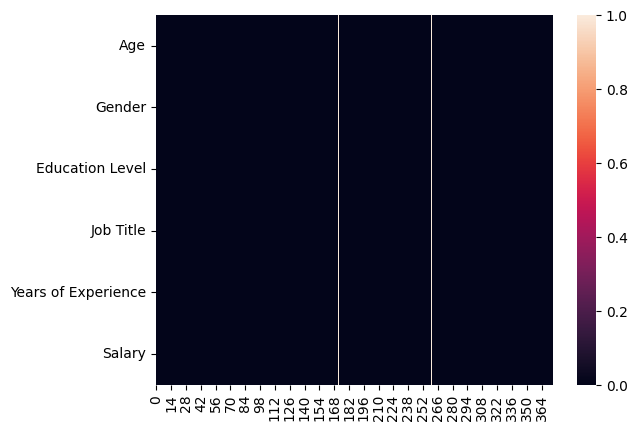

In [7]:
# visualizing missing values using seaborn
import seaborn as sns
sns.heatmap(df.isnull().transpose())

* The above heatmap shows .isnull() value False in black color and True value or null value in white color.
* The figure shows we have missing rows in between row 168 and 182. Similarly we have another missing row between 252 and 266.

In [8]:
df.loc[df.isna().any(axis="columns")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


# Numerical data

In [9]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


* The minumum age of a employee in that company is 23,
* The maximum age of a employee in that company is 53.
* 50% of the employee are of age <= 36.

# categorical data

In [10]:
df.describe(include="object")

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [11]:
df.Gender.value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [12]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

<Axes: ylabel='Salary'>

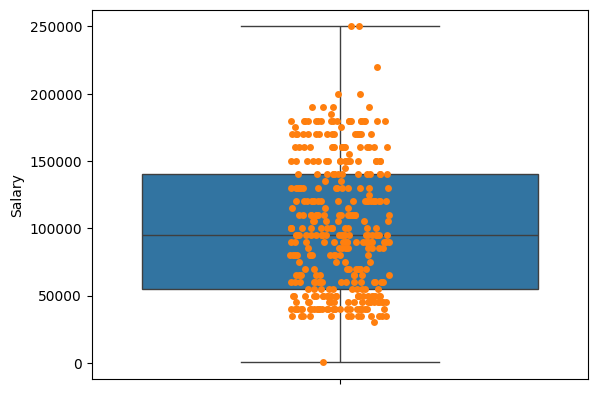

In [13]:
sns.boxplot(df["Salary"])
sns.stripplot(df["Salary"])

# Exploratory data analysis(EDA)

# Distribution of Male and female

<Axes: xlabel='Gender', ylabel='count'>

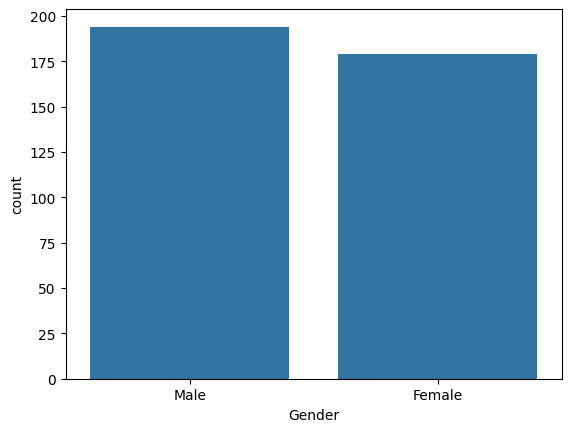

In [14]:
sns.countplot(x="Gender", data=df) # countplot and barplot are same

In [15]:
import plotly.express as px
px.bar(x=df["Gender"])

In [18]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


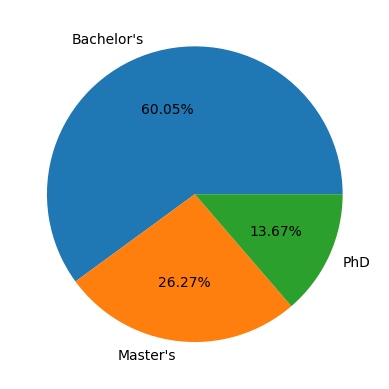

In [20]:
import matplotlib.pyplot as plt
s = df["Education Level"].value_counts()
# print(s)
plt.pie(s.values, labels = s.index, autopct = "%.2f%%")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

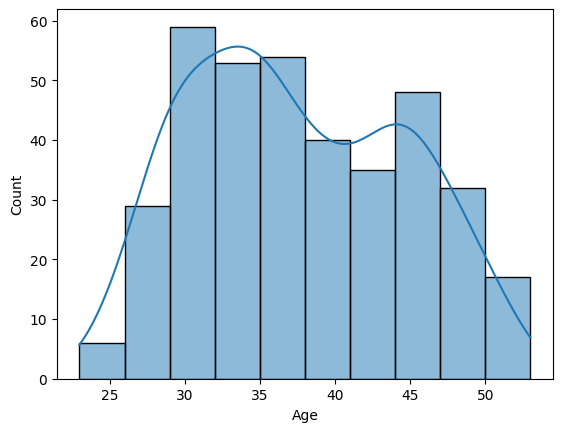

In [21]:
# lets analyze numerical data age
sns.histplot(df["Age"], kde=True)

<Axes: xlabel='Years of Experience', ylabel='Count'>

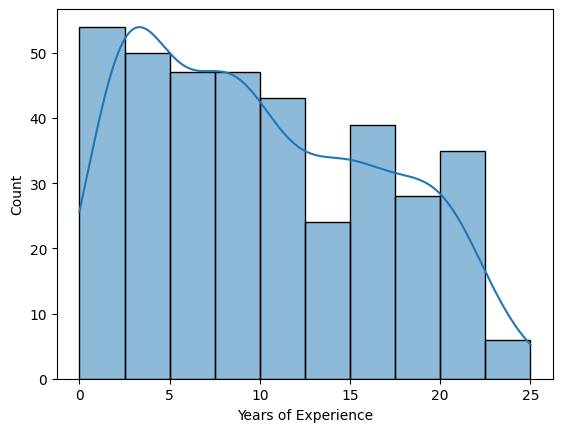

In [22]:
sns.histplot(df["Years of Experience"], kde=True)

# We want to predict salary of  employee using this data
Age, Gender, Education Level, Job title ,
* Years of Experience : Independent Variable, X, features
* Salary: Dependent variable, y, target

In this data we know both X and y. Therefore, it is a  supervised ML problem. The y is numerical and continuous to predict y we need to do Regression Task.

# Data Pre-processing and Cleaning
* Missing values detection and handling
* outliers detection and handling
* Data deduplication
* Feature scaling, Engineering and Selection etc.

# Handling missing values
**Delete**
* row: If entire row is missing and if target or y is missing
* column: if more than 70% data is missing in a column - we drop the column

**Imputation (fill in missing values)**
* mean: use mean to fill in missing values if data is normally distributed and has no outliers
* median: if data has outliers we use median to fill in missing values
* mode: if data is categorical we use mode to fill in missing values
* Algorithms: Use Linear Regression, MICE, IterativeImputer, RandomForest algorithms to fill in missing values
* EDA and domain knowledge can be used to fill in missing values
* Mathematical Techniques: Interpolation, Extrapolation

In [23]:
# In our case Entire row is missing so we should drop the rows
df.dropna(inplace=True)

In [24]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [25]:
df.shape

(373, 6)

In [26]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


# Feature Selection using the Idea of correlation.
* based in linear assumption X and y must be correlated

In [27]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<Axes: >

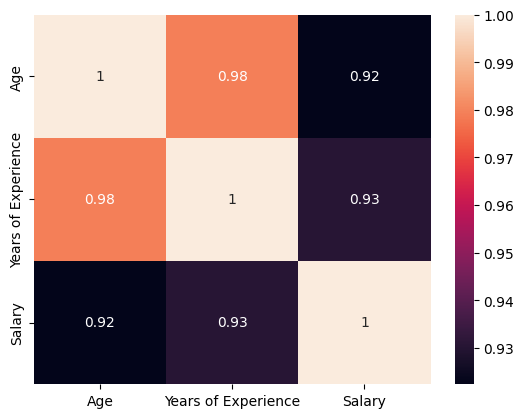

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* salary and Age are positively correlated with correlation value 0.92
* Salary and years of experience is also positively correlated with correlation value 0.93.
* Age and years of experience also have positive correlation with correlation value 0.98.

Age and years of experience both are independent variable. Generally they are not correlated if they are it is a problem of multi-colinarity.

In such a case you should drop one column

In our context which one should we drop?
* I think we should drop Age column. Because years of experience is more correlated with Salary column compared to Age. Also, YOE is readily available in inference time. It will be easy to predict salary using YOE.

In [49]:
X = df.loc[:, ["Years of Experience"]] # independent variable 2D
y = df.Salary # dependent variable 1D

<Axes: xlabel='Years of Experience', ylabel='Salary'>

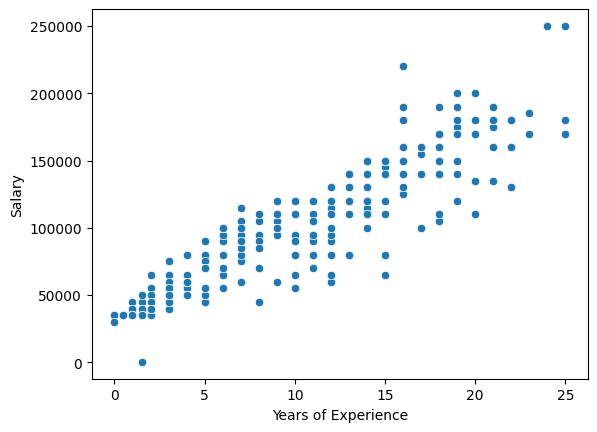

In [50]:
sns.scatterplot(x=df["Years of Experience"], y=df.Salary)

# Train test split

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg">

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [59]:
X_train.shape, y_train.shape

((298, 1), (298,))

In [61]:
X_test.shape, y_test.shape

((75, 1), (75,))

# Modeling

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
m = model.coef_
c = model.intercept_

In [77]:
print(f"coef_ = {m[0]}")
print(f"intercept_ = {c}")

coef_ = 6787.188518987736
intercept_ = 32303.401435069492


# Evaluation of test data (unseen data)

In [78]:
y_pred = model.predict(X_test)
y_pred

array([ 45877.77847304,  66239.34403001, 100175.28662495, 106962.47514393,
        52664.96699203,  52664.96699203,  52664.96699203, 100175.28662495,
        86600.90958697, 140898.41773887,  73026.532549  ,  86600.90958697,
        93388.09810596, 100175.28662495,  59452.15551102, 154472.79477685,
       113749.66366292,  32303.40143507, 106962.47514393,  45877.77847304,
       127324.0407009 ,  52664.96699203,  79813.72106798,  52664.96699203,
       181621.5488528 ,  86600.90958697,  79813.72106798,  86600.90958697,
        45877.77847304, 154472.79477685, 140898.41773887,  73026.532549  ,
        45877.77847304,  66239.34403001,  52664.96699203, 161259.98329584,
        45877.77847304, 127324.0407009 , 113749.66366292,  52664.96699203,
       120536.85218191, 113749.66366292,  52664.96699203,  93388.09810596,
       140898.41773887, 113749.66366292,  86600.90958697, 127324.0407009 ,
       100175.28662495,  45877.77847304, 161259.98329584, 100175.28662495,
        86600.90958697, 1

In [97]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error = {round(mse, 2)}")

Mean squared error = 208984955.11


In [98]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error = {round(mae, 2)}")


Mean absolute error = 10762.15


In [99]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"r2_score = {round(r2, 2)}")

r2_score = 0.9


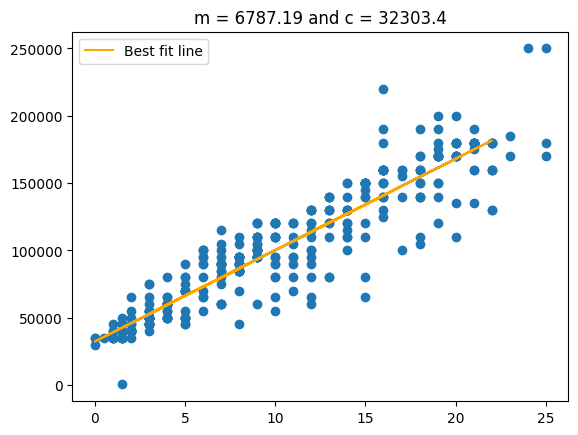

In [108]:
plt.scatter(x=df["Years of Experience"], y=df.Salary)
plt.plot(X_test, y_pred, color="orange", label="Best fit line")
plt.title(f"m = {round(m[0], 2)} and c = {round(c, 2)}")
plt.legend()
plt.show()

In [111]:
model.predict([[5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([66239.34403001])